# 量子コンピューター入門

Kifumi Numata, IBM Quantum (Nov 19, 2024)


In [ ]:
# 必要なパッケージをインストール
requirements = [
    "qiskit",
    "qiskit_aer",
    "qiskit_ibm_runtime",
    "matplotlib",
    "pylatexenc"
]
for x in requirements:
    !pip install $x > /dev/null

In [ ]:
# Qiskitライブラリーを導入
from qiskit import QuantumCircuit
from qiskit_aer import StatevectorSimulator, AerSimulator
from qiskit.visualization import plot_bloch_multivector
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt

In [ ]:
from google.colab import userdata

os.environ['QXToken'] = userdata.get('ibmToken')

### 空の回路

1 量子ビット回路から始めます。セルを選択して「Shift」＋「Enter」で実行できます。


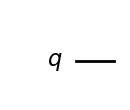

In [ ]:
# １量子ビット回路を用意
qc = QuantumCircuit(1)

qc.draw(output="mpl")  # 回路を描画

### X ゲート


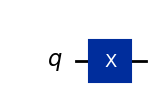

In [ ]:
qc = QuantumCircuit(1)  # １量子ビット回路を用意

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

qc.draw(output="mpl")  # 回路を描画

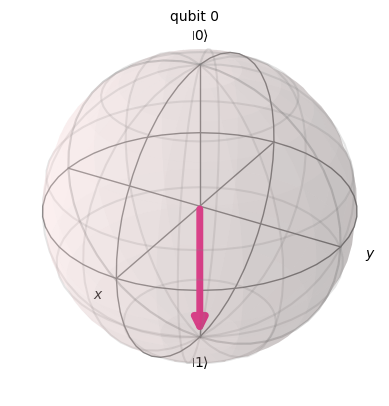

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### H ゲート


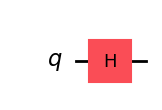

In [ ]:
qc = QuantumCircuit(1)  # １量子ビット回路を用意

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

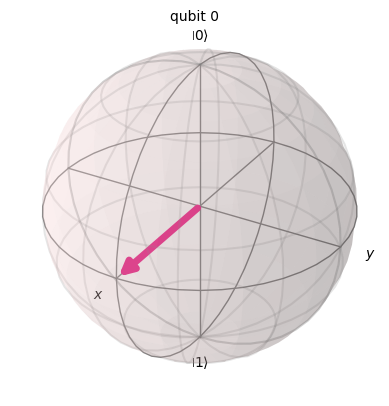

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### X ゲートと H ゲート


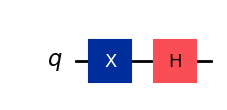

In [ ]:
qc = QuantumCircuit(1)  # １量子ビット回路を用意

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# 次にHゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

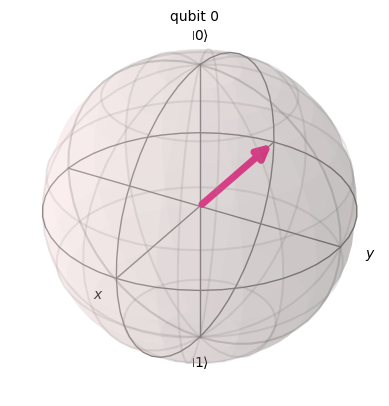

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### 1 量子ビットゲートの書き方


    qc.x(0)    # X軸の周りの回転
    qc.y(0)    # Y軸の周りのPi回転
    qc.z(0)    # Z軸の周りのPi回転
    qc.s(0)    # Z軸の周りのPi/2回転
    qc.sdg(0)  # Z軸の周りの-Pi/2回転
    qc.h(0)    # Hゲート
    qc.rx(theta, 0)    # X軸の周りのtheta回転
    qc.ry(theta, 0)    # Y軸の周りのtheta回転
    qc.rz(theta, 0)    # Z軸の周りのtheta回転


## 演習 1

次の回路を作ってブロッホ球を表示してみましょう。

#### 1-1
![day01-circuit1](https://drive.google.com/uc?export=view&id=18UVSdY8tHBAoyr5ZZ-_RUzRlYb3Btzwb)

#### 1-2
![day01-circuit2](https://drive.google.com/uc?export=view&id=1qTjEBDvL3qzXaZjB5K7QJp4tBm60q2cY)




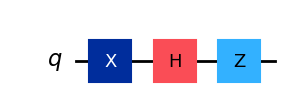

In [ ]:
# 1-1)
qc = QuantumCircuit(1)  # １量子ビット回路を用意

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# Zゲートを0番目の量子ビットに操作します。
qc.z(0)

# 回路を描画
qc.draw(output="mpl")

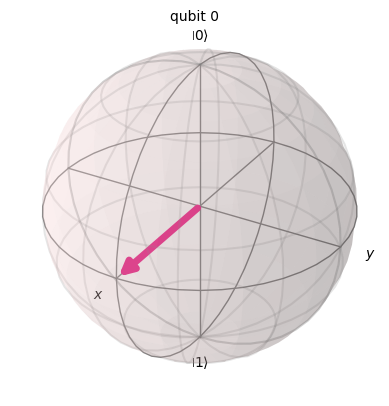

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

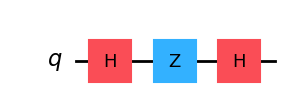

In [ ]:
# 1-2)
qc = QuantumCircuit(1)  # １量子ビット回路を用意

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# Zゲートを0番目の量子ビットに操作します。
qc.z(0)

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

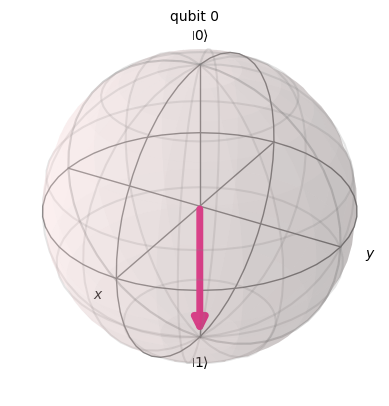

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### 2 量子ビット回路


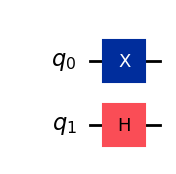

In [ ]:
qc = QuantumCircuit(2)  # 2量子ビット回路を用意

qc.x(0)
qc.h(1)

qc.draw(output="mpl")

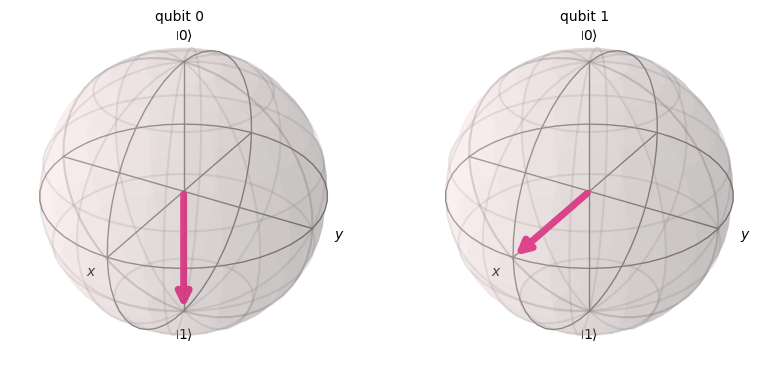

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### エンタングルメント


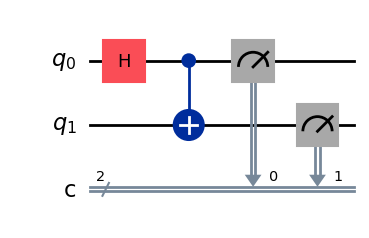

In [ ]:
# ２量子ビット回路を作成します。
qc = QuantumCircuit(2, 2)  # 2量子ビット, 2古典ビットレジスター

# ゲートを適用します。
qc.h(0)
qc.cx(0, 1)  # 制御NOTゲート

# 測定ゲートを追加
qc.measure(0, 0)  # 量子ビットq0を測定して、古典レジスターc0に入れます
qc.measure(1, 1)  # 量子ビットq1を測定して、古典レジスターc1に入れます

# 回路を描画
qc.draw(output="mpl")

{'00': 521, '11': 503}


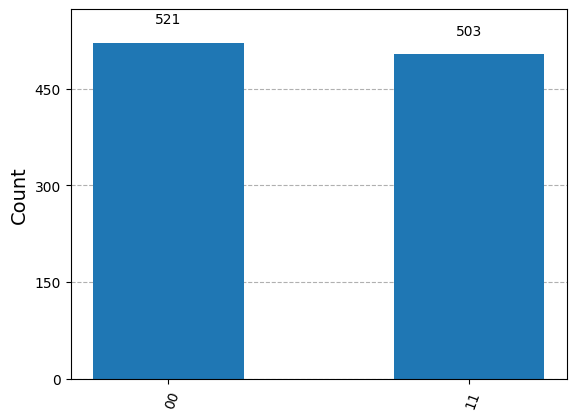

In [ ]:
# シミュレーターで実験
backend = AerSimulator()
sampler = SamplerV2(backend)
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram(counts)

In [ ]:
# 初めて実行する場合は、認証情報をディスクに保存します：
# https://quantum.ibm.com/ のAPI TokenをColabの左サイドバーの🔑タブから入力します
from google.colab import userdata

if len(QiskitRuntimeService.saved_accounts())==0:
    QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token=userdata.get("ibmToken"))

service = QiskitRuntimeService()
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

In [ ]:
# 以下でデバイスを指定できます。
backend = service.backend("ibm_kyiv")  # 例）ibm_kyivを使う場合

In [ ]:
# 一番空いているバックエンドを自動的に選択することもできます
backend = service.least_busy(operational=True)
print("最も空いているバックエンドは: ", backend)

最も空いているバックエンドは:  <IBMBackend('ibm_brisbane')>


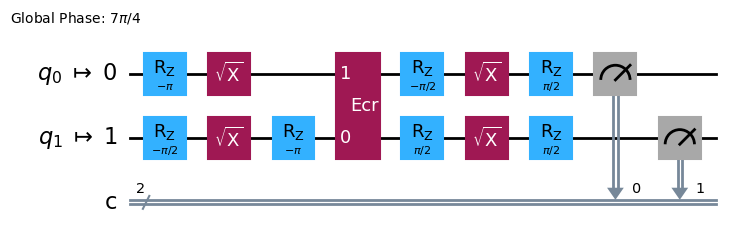

In [ ]:
# 実機のバックエンドでの実行に最適な回路に変換します
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

In [ ]:
# Samplerで実行します
sampler = SamplerV2(backend)
job = sampler.run([isa_circuit])

print("job id:", job.job_id())  # 実行に時間がかかるのでjob_idを表示します

job id: cwx74g2ehebg008jjp4g


In [ ]:
job = service.job(job.job_id())
job.status()  # ジョブの実行状態を確認します

'QUEUED'

上記のセルを何回か実行して、'DONE' が表示されたら、実機での実行が終わっているので、以下のセルを実行して結果を確認します。


In [ ]:
### 'DONE'になってから実行します ###
result = job.result()
print(result[0].data.c.get_counts())

{'00': 1846, '11': 1947, '01': 210, '10': 93}


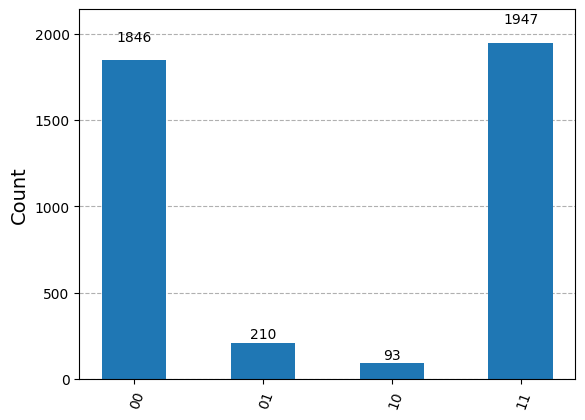

In [ ]:
plot_histogram(result[0].data.c.get_counts())

実機での実行を待つ間に、演習に取り組んでみましょう。

## 演習 2

次の回路を作って量子シミュレーターで実行してみましょう。

![day01-circuit3](https://drive.google.com/uc?export=view&id=12HEM28lUI8z77PaDXZcvTWvNfnndHocz)


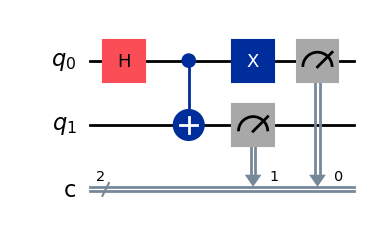

In [ ]:
# ２量子ビット回路を古典ビット含めて作成します。
qc = QuantumCircuit(2, 2)

# ゲートを適用します。
qc.h(0)
qc.cx(0, 1)
qc.x(0)

# 測定ゲートを追加
qc.measure(0, 0)
qc.measure(1, 1)

# 回路を描画
qc.draw(output="mpl")

{'10': 483, '01': 541}


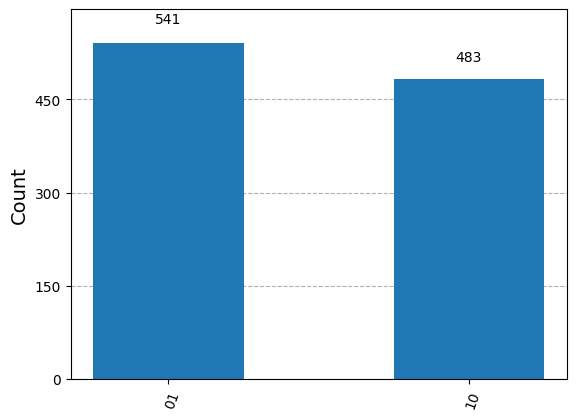

In [ ]:
# シミュレーターで実験
backend = AerSimulator()
sampler = SamplerV2(backend)
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram(counts)

### GHZ 状態
GHZ(Greenberger-Horne-Zeilinger)状態は、3つ以上の量子ビットが最大にもつれた状態です。3量子ビットのGHZ状態は次のように定義されます。

$$\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$$

この状態は次の量子回路でつくることができます。

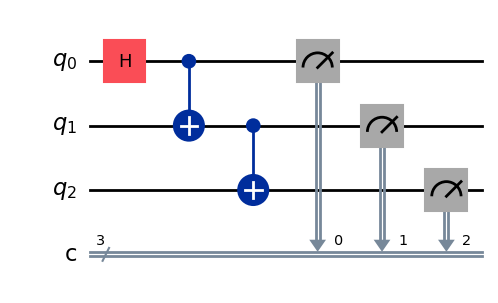

In [ ]:
qc = QuantumCircuit(3,3)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

qc.draw("mpl")

量子回路の評価指標の一つとして、量子回路の「深さ(Depth)」は重要な指標です。ノイズの多い量子コンピューターでは、より短い回路を作成することがエラーを減らす重要な要素になります。(次の動画は、深さを理解するのに役立つかもしれません： https://docs.quantum.ibm.com/_next/image?url=%2Fimages%2Fapi%2Fqiskit%2Fdepth.gif&w=1920&q=75 )

QuantumCircuit.depth()を使うと、量子回路の深さを調べることができます。上の回路の深さは4です。

In [ ]:
qc.depth()

4

## 演習 3

８量子ビットのGHZ状態は以下のように表されます。

$$\frac{1}{\sqrt 2}(|00000000\rangle + |11111111\rangle).$$

この状態を最も浅い回路で作ってみましょう。最も浅い量子回路の深さは、測定ゲートを合わせて5です。

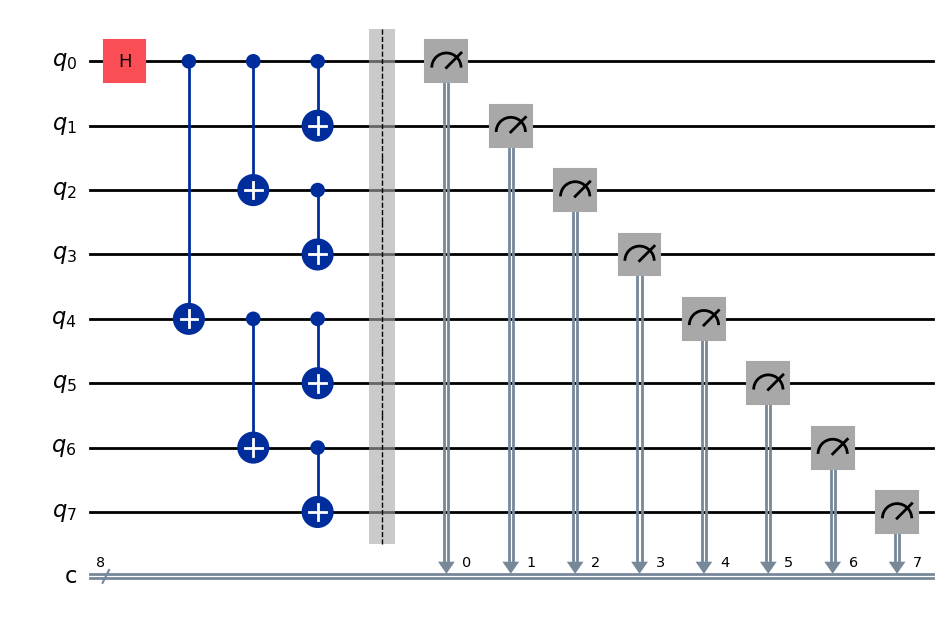

In [ ]:
qc = QuantumCircuit(8,8)

##この下にコードを記入してください##
qc.h(0)
qc.cx(0,4)
qc.cx(4,6)
qc.cx(6,7)

qc.cx(4,5)

qc.cx(0,2)
qc.cx(2,3)

qc.cx(0,1)
qc.barrier() # for visual separation

# 測定
for i in range(8):
    qc.measure(i, i)

qc.draw("mpl")
#print(qc.depth())

In [ ]:
print(qc.depth())

5


{'00000000': 518, '11111111': 506}


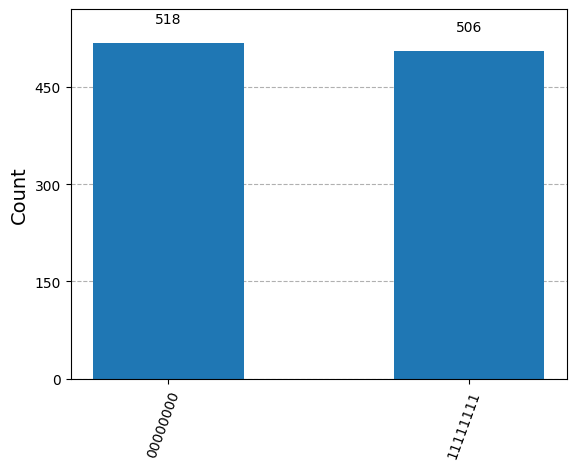

In [ ]:
# シミュレーターで実験
backend = AerSimulator()
sampler = SamplerV2(backend)
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram(counts)

In [ ]:
# Qiskitバージョンの確認
import qiskit

qiskit.__version__

'1.2.4'